<a href="https://colab.research.google.com/github/fidanismayilzada23/Data-Analitc/blob/main/Netflixanaliz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
df=pd.read_csv('/content/netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [118]:
#datanın ümumi infosunu çıxarırıq
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [119]:
#datanın uzunluğunu çıxarırıq
len(df)

8807

In [120]:
#null deyerlerin sayını çıxarırıq
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [121]:
#boşluqları silmek üçün bu funksiyadan istifade olunur
df['title']= df['title'].str.strip().str.title()
df['type']= df['type'].str.strip()
df['country']= df['country'].str.strip()

In [122]:
#çox boşluq olduğu üçün ve moda ile doldura bilecek bir boşluq olmadığı üçün fillna ile doldururuq
df['country']=df['country'].fillna('Unknown')
df['cast']=df['cast'].fillna('Unknown')
df['director']=df['director'].fillna('Unknown')

In [123]:
df['country']

,country
0,United States
1,South Africa
2,Unknown
3,Unknown
4,India
...,...
8802,United States
8803,Unknown
8804,United States
8805,United States


In [124]:
#ratingi moda ile doldura bileceyimiz üçün onun boşluqlarını moda ile doldururuq
#date ve durationda dropla sile bilir null az olduğu üçün
df['rating']=df['rating'].fillna(df['rating'].mode()[0])
df=df.dropna(subset=['date_added','duration'])

In [125]:
df.duplicated().sum()
#eger duplikat olsaydı dropduplicated ile dile bilerdik

np.int64(0)

In [126]:
df['date_added'].sample(15)

,date_added
5505,"May 1, 2017"
636,"June 25, 2021"
3284,"November 15, 2019"
3630,"August 2, 2019"
2739,"April 1, 2020"
4856,"May 18, 2018"
6887,"October 15, 2017"
7555,"March 10, 2018"
1785,"October 28, 2020"
7269,"March 11, 2020"


In [127]:
#tarixde format eyni deyilse mixed vererek bir bir baxmasını ve deyişmesini isteyirik ve error varsa not a time ile doldursun
df['date_added']=pd.to_datetime(df['date_added'],format='mixed',errors='coerce')

/tmp/ipython-input-4154198524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_added']=pd.to_datetime(df['date_added'],format='mixed',errors='coerce')


In [128]:
#deyerleri vergille ayrılıb ve onu ayrımaq isteyirikse eger extarctla ayırırıq
#r d+ yazdığımız reqemleri ayırıq
#r A Za z ise bu herfleri yazırıq ve kiçik böyük herf qarışıqlığı olmadan.

df['duration_value']=df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_type']=df['duration'].str.extract(r'([A-Za-z]+)').astype(str)

/tmp/ipython-input-1781391665.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_value']=df['duration'].str.extract(r'(\d+)').astype(float)
/tmp/ipython-input-1781391665.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_type']=df['duration'].str.extract(r'([A-Za-z]+)').astype(str)


In [129]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons


In [130]:
#data temizlendi
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [131]:
#data çox yer tutmaması üçün bezen categori tipindende istifade edilir.
df['type']=df['type'].astype('category')
df['ratin']=df['rating'].astype('category')
df['duration_type']=df['duration_type'].astype('category')


/tmp/ipython-input-3390622462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type']=df['type'].astype('category')
/tmp/ipython-input-3390622462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ratin']=df['rating'].astype('category')
/tmp/ipython-input-3390622462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [132]:
df.dtypes

,0
show_id,object
type,category
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object


In [133]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'duration_value', 'duration_type', 'ratin'],
      dtype='object')

In [136]:
df.describe(include='O')

,show_id,title,director,cast,country,rating,duration,listed_in,description
count,8794,8794,8794,8794,8794,8794,8794,8794,8794
unique,8794,8788,4528,7682,749,14,220,513,8762
top,s8807,Fullmetal Alchemist,Unknown,Unknown,United States,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,2,2624,825,2809,3209,1793,362,4


In [137]:
df.nunique()

,0
show_id,8794
type,2
title,8788
director,4528
cast,7682
country,749
date_added,1714
release_year,74
rating,14
duration,220


In [138]:
#ratinqde unik deyerler var bunu kategorilere göre ayırırıq
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [139]:
df['rating'].nunique()

14

In [140]:
rating_groups = {
    'Kids': ['TV-Y', 'TV-Y7', 'TV-G', 'G', 'TV-Y7-FV'],
    'Teens': ['TV-PG', 'PG', 'PG-13', 'TV-14'],
    'Adults': ['TV-MA', 'R', 'NC-17', 'NR', 'UR']
}
def cat(x):
  for k ,v in rating_groups.items():
    if x['rating'] in v:
      return k
df=df.copy()
df['category']=df.apply(lambda x : cat(x),axis=1)

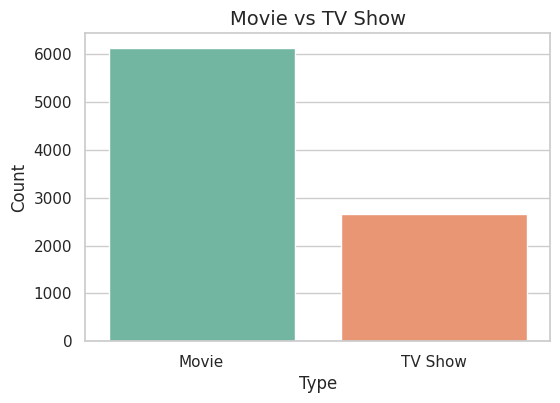

In [143]:
sns.set(style='whitegrid')
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type',palette='Set2',hue='type')
plt.title('Movie vs TV Show',fontsize=14)
plt.ylabel('Count')
plt.xlabel('Type')
plt.show();

# filimlerin tv showlardan daha çox olduğunu görürük.

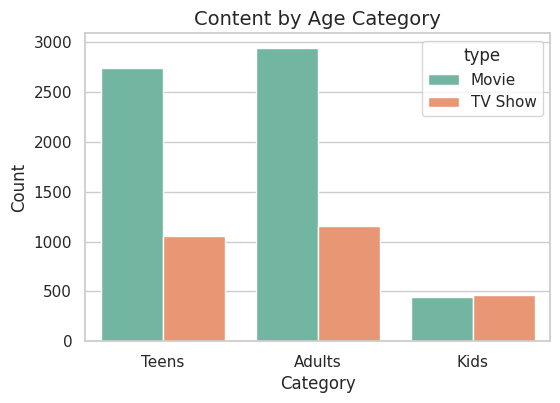

In [144]:
sns.set(style='whitegrid')
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='category',palette='Set2',hue='type')
plt.title('Content by Age Category',fontsize=14)
plt.ylabel('Count')
plt.xlabel('Category')
plt.show();


/tmp/ipython-input-1034058586.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', palette=['green','red','gray'])


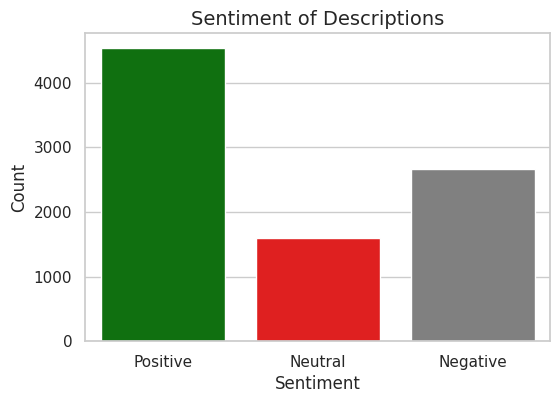

In [145]:
from textblob import TextBlob # texti analiz edir 3 hissede yaxşi orta pis olaraq
df['sentiment'] = df['description'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x>0 else ('Negative' if x<0 else 'Neutral'))

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment_label', palette=['green','red','gray'])
plt.title('Sentiment of Descriptions', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.show()

In [146]:
# filimin reylerine esasen pozitif ve ya negatif olduğunun doğruluğunu yoxlayırıq
pd.set_option('display.max_colwidth', None)
df[['title','description']].sample(10)

,title,description
1429,Mighty Little Bheem: Kite Festival,"With winter behind them, Bheem and his townspeople usher in a sunny new season in all their favorite ways during the Makar Sankranti festival."
8700,Wartime Portraits,"Part live-action and part animation, this visually inventive series offers striking portrayals of some of the unsung heroes of World War II."
5252,Gerald'S Game,"When her husband's sex game goes wrong, Jessie – handcuffed to a bed in a remote lake house – faces warped visions, dark secrets and a dire choice."
4359,Spy Kids: Mission Critical,"In this animated spinoff series, Juni and Carmen Cortez must battle the evil organization S.W.A.M.P. – without the help of their super-spy parents."
6153,An American Tail: The Mystery Of The Night Monster,"When a monster goes on a mouse-napping spree in New York, Fievel and his friends help a reporter get to the bottom of the mystery."
4802,Zoo,"A drug dealer starts having doubts about his trade as his brother, his client, and two rappers from the slums each battle their own secret addictions."
7530,Mutiny On The Bounty,"Marlon Brando gives a nuanced performance as the aristocratic Lt. Fletcher Christian, an officer aboard the HMS Bounty who leads a mutiny against the ship's tyrannical Capt. Bligh."
6944,He Named Me Malala,"This documentary tells the story of a teenage Pakistani girl shot for her advocacy of women's education, her survival, and her continued efforts."
3971,Ainori Love Wagon: Asian Journey,"Seven men and women board a pink bus in search of true love. On a journey through Asia with strangers, their goal is to return to Japan as a couple."
1236,Sentinelle,"Transferred home after a traumatizing combat mission, a highly trained French soldier uses her lethal skills to hunt down the man who hurt her sister."


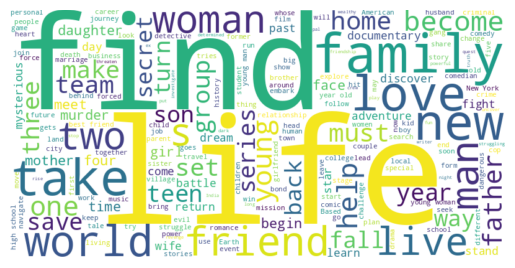

In [147]:
#reylerde en çox istifade olunan kelimeleri çıxarır
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

/tmp/ipython-input-3380800314.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


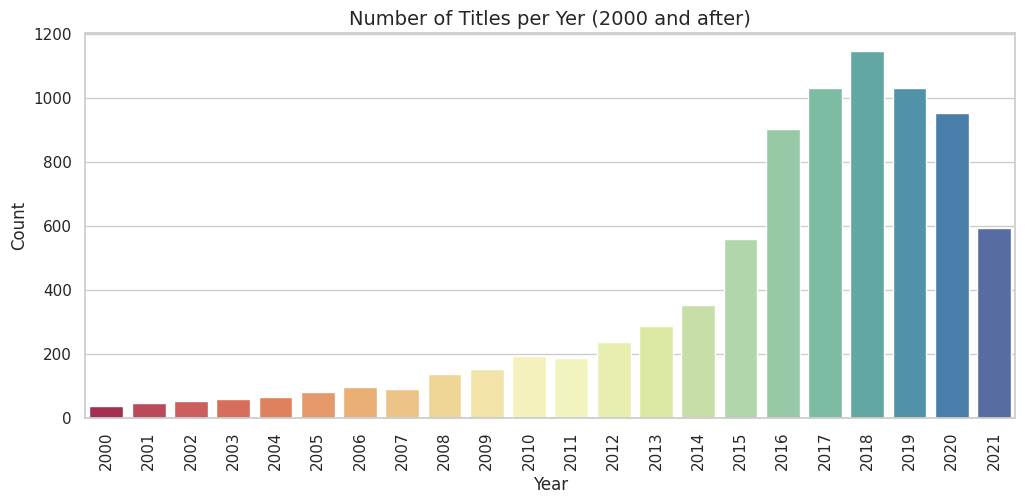

In [149]:
# 2000 ve sonrası üçün filter
df_after_2000=df[df['release_year']>=2000]
plt.figure(figsize=(12,5))
sns.countplot(
    data=df_after_2000,
    x='release_year',
    palette='Spectral',
    order=sorted(df_after_2000['release_year'].dropna().unique())
)
plt.xticks(rotation=90)
plt.title('Number of Titles per Yer (2000 and after)', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

In [150]:
top_countres=df['country'].value_counts().head(10)
top_countres

,count
country,
United States,2809
India,972
Unknown,830
United Kingdom,418
Japan,244
South Korea,199
Canada,181
Spain,145
France,124


/tmp/ipython-input-2698466729.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


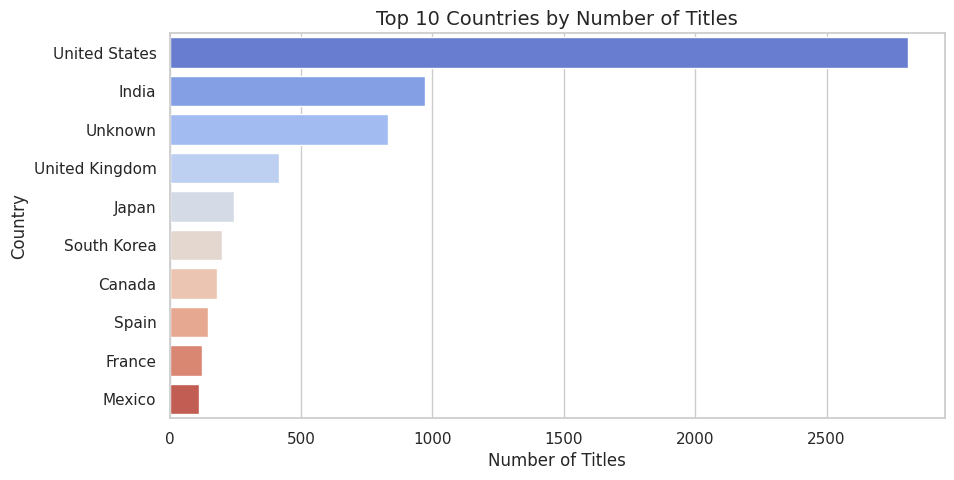

In [151]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries by Number of Titles', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

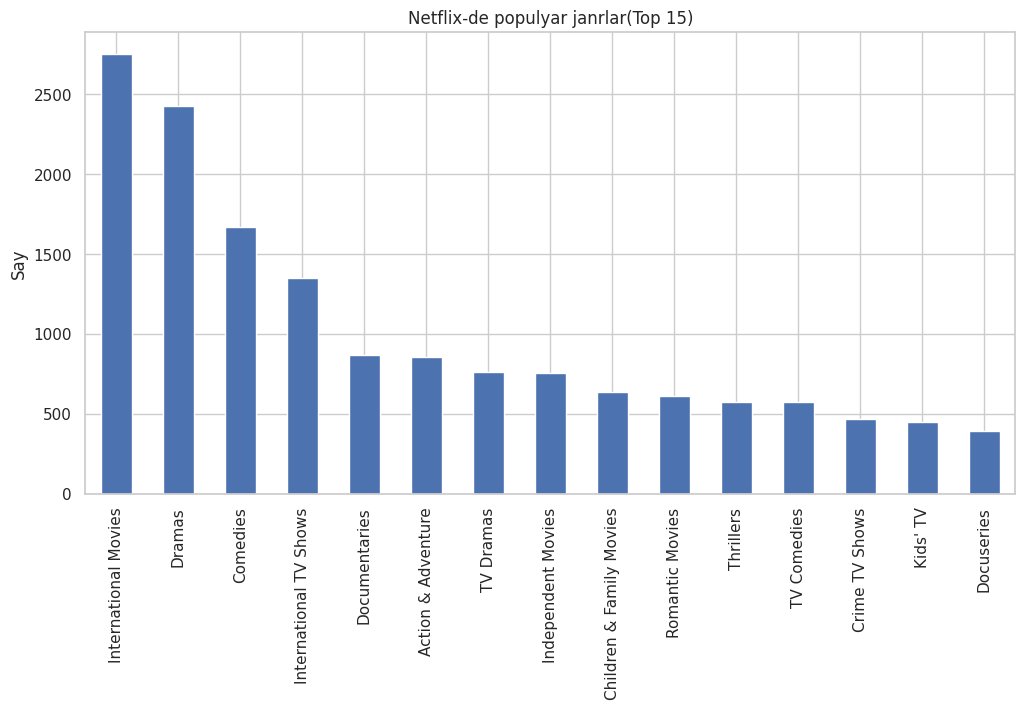

In [155]:
genres=df['listed_in'].str.split(', ',expand=True).stack()
plt.figure(figsize=(12,6))
genres.value_counts().head(15).plot(kind='bar')
plt.title('Netflix-de populyar janrlar(Top 15)')
plt.ylabel('Say')
plt.show()


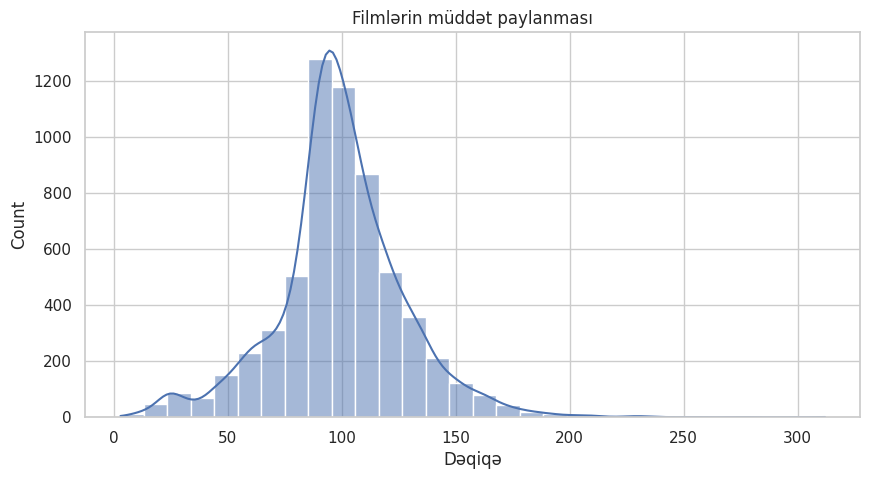

In [156]:
movies = df[df['type']=='Movie']
plt.figure(figsize=(10,5))
sns.histplot(movies['duration_value'], bins=30, kde=True)
plt.title('Filmlərin müddət paylanması')
plt.xlabel('Dəqiqə')
plt.show()

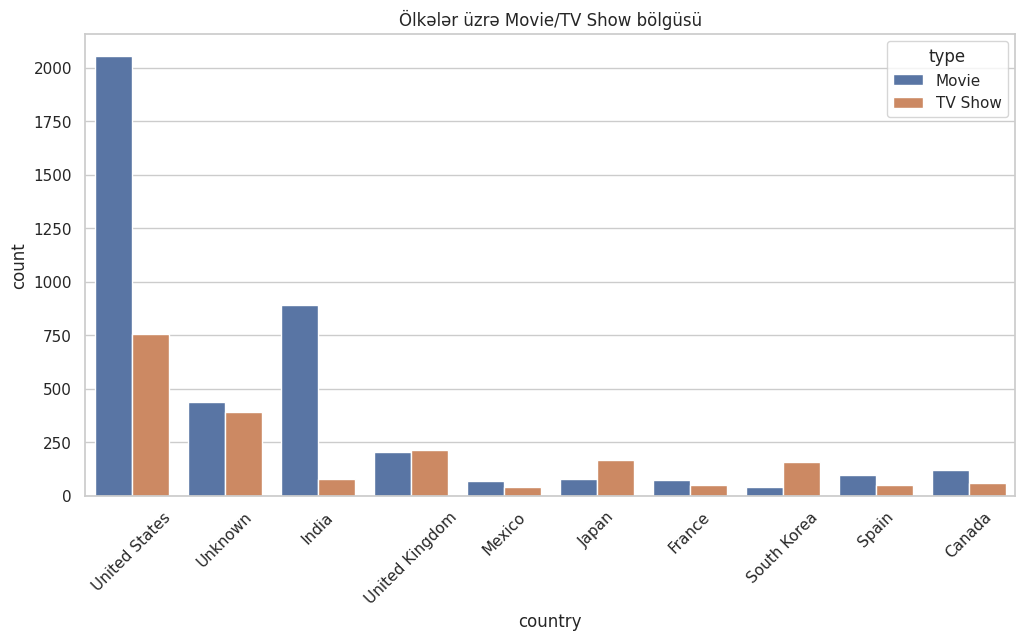

In [157]:
top_countries = df['country'].value_counts().head(10).index
sub = df[df['country'].isin(top_countries)]
plt.figure(figsize=(12,6))
sns.countplot(data=sub, x='country', hue='type')
plt.title( 'Ölkələr üzrə Movie/TV Show bölgüsü')
plt.xticks(rotation=45)
plt.show()

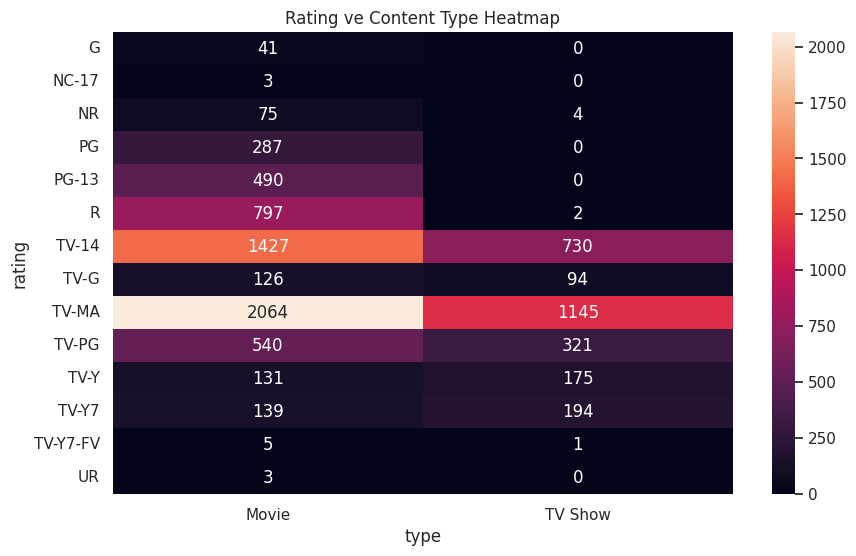

In [161]:
plt.figure(figsize=(10,6))
cross=df.pivot_table(index='rating',columns='type',aggfunc='size',fill_value=0,observed=False)
sns.heatmap(cross,annot=True,fmt='d')
plt.title('Rating ve Content Type Heatmap')
plt.show()